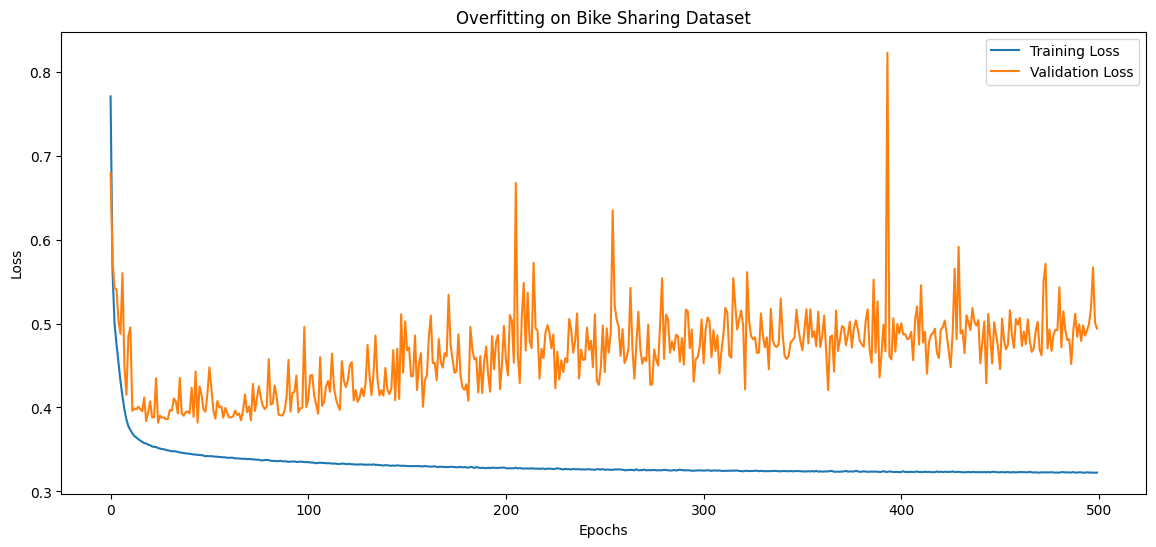

Minimum Loss: 0.3818759620189667 
After 24 epochs


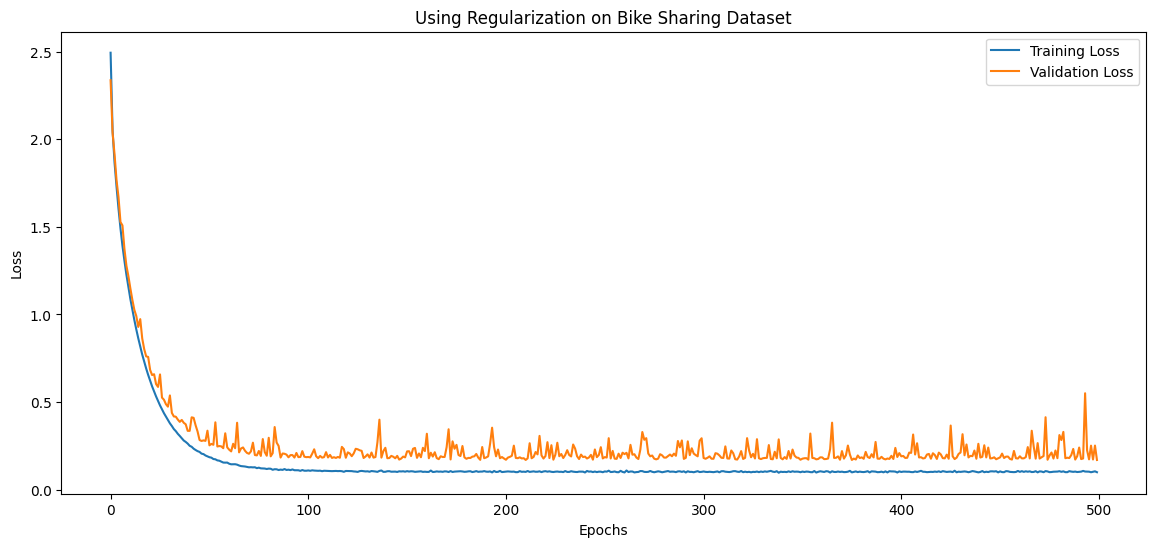

Minimum Loss: 0.1692999005317688 
After 499 epochs


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

data = pd.read_csv('/content/hour.csv')

ohe_features = ['season', 'mnth', 'hr', 'weekday']
for feature in ohe_features:
    dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

drop_features = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis=1)

norm_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for feature in norm_features:
    mean, std = data[feature].mean(), data[feature].std()
    scaled_features[feature] = [mean, std]
    data.loc[:, feature] = (data[feature] - mean) / std

test_data = data[-31*24:]
data = data[:-31*24]

target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

x_train, y_train = features[:-30*24], targets[:-30*24]
x_val, y_val = features[-30*24:], targets[-30*24:]

x_train, y_train = x_train.values.astype(np.float32), y_train['cnt'].values.astype(np.float32)
x_val, y_val = x_val.values.astype(np.float32), y_val['cnt'].values.astype(np.float32)

model = Sequential()
model.add(Dense(250, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

n_epochs = 500
batch_size = 50
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size, epochs=n_epochs, verbose=0)

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.title('Overfitting on Bike Sharing Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Minimum Loss:', min(history.history['val_loss']), '\nAfter', np.argmin(history.history['val_loss']), 'epochs')

model_reg = Sequential()
model_reg.add(Dense(250, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(1, activation='linear'))
model_reg.compile(loss='mse', optimizer='sgd', metrics=['mse'])

history_reg = model_reg.fit(x_train, y_train,
                            validation_data=(x_val, y_val),
                            batch_size=batch_size, epochs=n_epochs, verbose=0)

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(history_reg.history['loss'])), history_reg.history['loss'], label='Training Loss')
plt.plot(np.arange(len(history_reg.history['val_loss'])), history_reg.history['val_loss'], label='Validation Loss')
plt.title('Using Regularization on Bike Sharing Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Minimum Loss:', min(history_reg.history['val_loss']), '\nAfter', np.argmin(history_reg.history['val_loss']), 'epochs')
